<a href="https://colab.research.google.com/github/tu22014/EU_M_Math-Repository/blob/main/Chapter8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#ライブラリのインポート
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

#可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mp1
import seaborn as sns
sns.set()
%matplotlib inline

#機械学習ライブラリ
import sklearn

#少数第3位まで表記
%precision 3

'%.3f'

In [2]:
#(8-2)重回帰
#(8-2-1)自動車価格データの取り込み
# インポート
import requests, zipfile
import io

# 自動車価格データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
auto.columns =['symboling','normalized-losses','make','fuel-type' ,'aspiration','num-of-doors',
                            'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
                            'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
                            'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [3]:
print('自動車データの形式:{}'.format(auto.shape))

自動車データの形式:(205, 26)


In [4]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
#(8-2-2)データの整理
#(8-2-2-1)不適切なデータの除去
# それぞれのカラムに ? が何個あるかカウント
auto = auto[['price','horsepower','width','height']]
#auto = auto[['price','horsepower','width','height']]
auto.isin(['?']).sum()

price         4
horsepower    2
width         0
height        0
dtype: int64

In [6]:
# '?'をNaNに置換して、NaNがある行を削除
auto = auto.replace('?', np.nan).dropna()
print('自動車データの形式:{}'.format(auto.shape))

自動車データの形式:(199, 4)


In [7]:
auto.head()

,price,horsepower,width,height
0,13495,111,64.1,48.8
1,16500,111,64.1,48.8
2,16500,154,65.5,52.4
3,13950,102,66.2,54.3
4,17450,115,66.4,54.3


In [8]:
#(8-2-2-2)型の変換
print('データの型の確認（置換前）\n{}'.format(auto.dtypes))

データの型の確認（置換前）
price          object
horsepower     object
width         float64
height        float64
dtype: object


In [9]:
auto = auto.assign(price=pd.to_numeric(auto.price))
auto = auto.assign(horsepower=pd.to_numeric(auto.horsepower))
print('データの型の確認（置換後）\n{}'.format(auto.dtypes))

データの型の確認（置換後）
price           int64
horsepower      int64
width         float64
height        float64
dtype: object


In [10]:
#(8-2-2-3)相関の確認
auto.corr()

,price,horsepower,width,height
price,1.000000,0.810533,0.753871,0.134990
horsepower,0.810533,1.000000,0.615315,-0.087407
width,0.753871,0.615315,1.000000,0.309223
height,0.134990,-0.087407,0.309223,1.000000


In [11]:
#(8-2-3)モデル構築と評価
# データ分割（訓練データとテストデータ）のためのインポート
from sklearn.model_selection import train_test_split

# 重回帰のモデル構築のためのインポート
from sklearn.linear_model import LinearRegression

 # 目的変数にpriceを指定、説明変数にそれ以外を指定
X = auto.drop('price', axis=1)
y = auto['price']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 重回帰クラスの初期化と学習
model = LinearRegression()
model.fit(X_train,y_train)

# 決定係数を表示
print('決定係数(train):{:.3f}'.format(model.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,y_test)))
 
# 回帰係数と切片を表示
print('\n回帰係数\n{}'.format(pd.Series(model.coef_, index=X.columns)))
print('切片: {:.3f}'.format(model.intercept_))

決定係数(train):0.733
決定係数(test):0.737

回帰係数
horsepower      81.651078
width         1829.174506
height         229.510077
dtype: float64
切片: -128409.046


In [12]:
#(8-3)ロジスティック回帰
#(8-3-1)ロジスティック回帰の例
# データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
adult = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
adult.columns =['age','workclass','fnlwgt','education','education-num','marital-status',
                             'occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week',
                             'native-country','flg-50K']


# データの形式と欠損数を出力
print('データの形式:{}'.format(adult.shape))
print('欠損の数:{}'.format(adult.isnull().sum().sum()))

# データの先頭5行を出力
adult.head()

データの形式:(32561, 15)
欠損の数:0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,flg-50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
print(adult.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
flg-50K           object
dtype: object


In [14]:
#(8-3-2)データの整理
adult.groupby('flg-50K').size()

flg-50K
 <=50K    24720
 >50K      7841
dtype: int64

In [15]:
adult['fin_flg'] = adult['flg-50K'].map(lambda x: 1 if x ==' >50K' else 0)
adult.groupby('fin_flg').size()

fin_flg
0    24720
1     7841
dtype: int64

In [16]:
#(8-3-3)モデル構築と評価
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 説明変数と目的変数の設定
X = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y = adult['fin_flg']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# ロジスティック回帰クラスの初期化と学習
model = LogisticRegression()
model.fit(X_train,y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.797
正解率(test):0.798


In [17]:
model.coef_

array([[-1.185e-02, -4.379e-06, -2.774e-03,  3.274e-04,  7.532e-04]])

In [18]:
np.exp(model.coef_)

array([[0.988, 1.   , 0.997, 1.   , 1.001]])

In [19]:
#(8-3-4)スケーリングによる予測精度の向上
# 標準化のためのクラスをインポート
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Xとyを設定
X = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y = adult['fin_flg']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# ロジスティック回帰クラスの初期化と学習
model = LogisticRegression()
model.fit(X_train_std,y_train)

# 正解率の表示
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.811
正解率(test):0.810


In [20]:
#(8-4)正則化項のある回帰：ラッソ回帰、リッジ回帰
#(8-4-2)重回帰とリッジ回帰の比較
auto.head()

,price,horsepower,width,height
0,13495,111,64.1,48.8
1,16500,111,64.1,48.8
2,16500,154,65.5,52.4
3,13950,102,66.2,54.3
4,17450,115,66.4,54.3


In [21]:
# リッジ回帰用のクラス
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# 訓練データとテストデータに分割
X = auto.drop('price', axis=1)
y = auto['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# モデルの構築と評価
linear = LinearRegression()
ridge = Ridge(random_state=0)

for model in [linear, ridge]:
    model.fit(X_train,y_train)
    print('{}(train):{:.6f}'.format(model.__class__.__name__ , model.score(X_train,y_train)))
    print('{}(test):{:.6f}'.format(model.__class__.__name__ , model.score(X_test,y_test)))

LinearRegression(train):0.733358
LinearRegression(test):0.737069
Ridge(train):0.733355
Ridge(test):0.737768


In [22]:
#(8-5)決定木
#(8-5-1)キノコデータセット
# データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
mushroom.columns =['classes','cap_shape','cap_surface','cap_color','bruises','odor',
                             'gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape',
                             'stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
                             'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
                             'ring_number','ring_type','spore_print_color','population','habitat']

# 先頭5行を表示
mushroom.head()

,classes,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [23]:
print('データの形式:{}'.format(mushroom.shape))
print('欠損の数:{}'.format(mushroom.isnull().sum().sum()))

データの形式:(8124, 23)
欠損の数:0


In [24]:
#(8-5-2)データの整理
mushroom_dummy = pd.get_dummies(mushroom[['gill_color','gill_attachment','odor','cap_color']])
mushroom_dummy.head()

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [25]:
# 目的変数もフラグ化（0/1化）する
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x: 1 if x =='p' else 0)

In [26]:
#(8-5-5)決定木のモデル構築
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# データ分割
X = mushroom_dummy.drop('flg', axis=1)
y = mushroom_dummy['flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 決定木クラスの初期化と学習
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X_train,y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.991
正解率(test):0.992


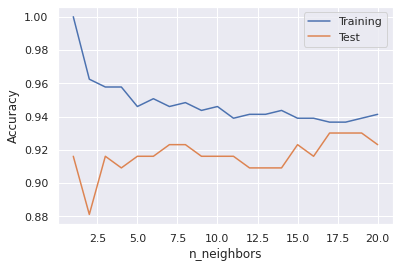

In [27]:
#(8-6)k-NN(k近傍法)
#(8-6-1)k-NNのモデル構築
# データやモデルを構築するためのライブラリ等のインポート
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import train_test_split

# データセットの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
# stratifyは層化別抽出
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

# グラフ描画用のリストを用意
training_accuracy = []
test_accuracy =[]

# 学習
for n_neighbors in range(1,21):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train,y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

# グラフを描画
plt.plot(range(1,21), training_accuracy, label='Training')
plt.plot(range(1,21), test_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

In [28]:
#(8-7)サポートベクターマシン
#(8-7-1)サポートベクターマシンのモデル構築
# SVMのライブラリ
from sklearn.svm import LinearSVC

# 訓練データとテストデータを分けるライブラリ
from sklearn.model_selection import train_test_split

# データの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

# クラスの初期化と学習
model = LinearSVC()
model.fit(X_train,y_train)

# 訓練データとテストデータのスコア
print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.927
正解率(test):0.895


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [29]:
# データの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# クラスの初期化と学習
model = LinearSVC()
model.fit(X_train_std,y_train)

# 訓練データとテストデータのスコア
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.993
正解率(test):0.951


In [30]:
#(Chap08_Ex-01)
#自動車価格データの取り込み
# インポート
import requests, zipfile
import io

# 自動車価格データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
auto.columns =['symboling','normalized-losses','make','fuel-type' ,'aspiration','num-of-doors',
                            'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
                            'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
                            'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

#カラムをprice,engine-size,widthに絞り込み
auto = auto[['price','engine-size','width']]
# '?'をNaNに置換して、NaNがある行を削除
auto = auto.replace('?', np.nan).dropna()

# データ分割（訓練データとテストデータ）のためのインポート
from sklearn.model_selection import train_test_split

# 重回帰のモデル構築のためのインポート
from sklearn.linear_model import LinearRegression

 # 目的変数にpriceを指定、説明変数にそれ以外を指定
X = auto.drop('price', axis=1)
y = auto['price']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 重回帰クラスの初期化と学習
model = LinearRegression()
model.fit(X_train,y_train)

# 決定係数を表示
print('決定係数(train):{:.3f}'.format(model.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,y_test)))
 
# 回帰係数と切片を表示
print('\n回帰係数\n{}'.format(pd.Series(model.coef_, index=X.columns)))
print('切片: {:.3f}'.format(model.intercept_))

決定係数(train):0.783
決定係数(test):0.778

回帰係数
engine-size     109.526787
width          1261.735518
dtype: float64
切片: -84060.643


In [31]:
#(Chap08_Ex-02)
# データやモデルを構築するためのライブラリ等のインポート
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
# データセットの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
# stratifyは層化別抽出
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

# ロジスティック回帰クラスの初期化と学習
model = LogisticRegression()
model.fit(X_train,y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.958
正解率(test):0.923


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [32]:
#(Chap08_Ex-03)
# 標準化のためのクラスをインポート
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# ロジスティック回帰クラスの初期化と学習
model = LogisticRegression()
model.fit(X_train_std,y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.991
正解率(test):0.958


In [33]:
#(Chap08_Ex-04)
#公式ドキュメント
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

#ライブラリのインポート
from sklearn.linear_model import LinearRegression, Lasso
# 自動車価格データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
auto.columns =['symboling','normalized-losses','make','fuel-type' ,'aspiration','num-of-doors',
                            'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
                            'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
                            'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

#カラムをprice,engine-size,widthに絞り込み
auto = auto[['price','horsepower','width','height']]
# '?'をNaNに置換して、NaNがある行を削除
auto = auto.replace('?', np.nan).dropna()


X = auto.drop('price', axis=1)
y = auto['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

models = {
    'linear': LinearRegression(),
    'lasso1':  Lasso(alpha=1.0, random_state=0),
    'lasso2':  Lasso(alpha=200.0, random_state=0)
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train,y_train)
    scores[(model_name, 'train')] = model.score(X_train, y_train)
    scores[(model_name, 'test')] = model.score(X_test, y_test)

pd.Series(scores).unstack()

,test,train
lasso1,0.737107,0.733358
lasso2,0.743235,0.733082
linear,0.737069,0.733358


In [34]:
#(Chap08_Ex-05)
from sklearn.tree import  DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=66)

models = {
    'tree1': DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=0),
    'tree2': DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0),
    'tree3': DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0),
    'tree4': DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0),
    'tree5': DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0),
    'tree6': DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train,y_train)
    scores[(model_name, 'train')] = model.score(X_train, y_train)
    scores[(model_name, 'test')] = model.score(X_test, y_test)

pd.Series(scores).unstack()

,test,train
tree1,0.930070,0.971831
tree2,0.902098,0.997653
tree3,0.902098,1.000000
tree4,0.923077,0.974178
tree5,0.895105,1.000000
tree6,0.895105,1.000000


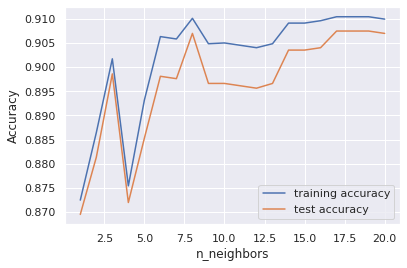

In [35]:
#(Chap08_Ex-06)
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

mush = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)
mush.columns =[
    'classes','cap_shape','cap_surface','cap_color','odor','bruises',
    'gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape',
    'stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
    'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
    'ring_number','ring_type','spore_print_color','population','habitat'
]

mush_dummy = pd.get_dummies(mush[['gill_color','gill_attachment','odor','cap_color']])
mush_dummy['flg'] = mush['classes'].map(lambda x: 1 if x =='p' else 0)

from sklearn.neighbors import  KNeighborsClassifier

# 説明変数と目的変数
X = mush_dummy.drop('flg', axis=1)
y = mush_dummy['flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

training_accuracy = []
test_accuracy =[]
neighbors_settings = range(1,21)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

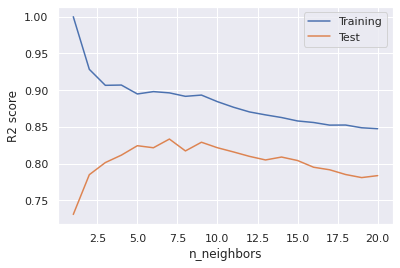

In [36]:
#(Chap08_Ex-07)

#データをurlから習得する
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
r = requests.get(url, stream=True)

# zipfileを読み込み展開する
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

#データの読み込み
student_data_math = pd.read_csv('student-mat.csv', sep=';')

student = pd.read_csv('student-mat.csv', sep=';')
X = student.loc[:, 
    ['age','Medu','Fedu','traveltime','studytime',
     'failures','famrel','freetime','goout','Dalc','Walc',
     'absences','G1','G2']].values

from sklearn.neighbors import  KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, student.G3, random_state=0)

scores_train = []
scores_test =[]
neighbors_settings = range(1, 21)
for n_neighbors in neighbors_settings:
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    scores_train.append(model.score(X_train, y_train))
    scores_test.append(model.score(X_test, y_test))
    
plt.plot(neighbors_settings, scores_train,label='Training')
plt.plot(neighbors_settings, scores_test,label='Test')
plt.ylabel('R2 score')
plt.xlabel('n_neighbors')
plt.legend()

In [37]:
#(Chap08_Ex-08)
from sklearn.svm import SVC
# データの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# クラスの初期化と学習
model = SVC(kernel = 'rbf', random_state=0, C=2)
model.fit(X_train_std,y_train)

# 訓練データとテストデータのスコア
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.995
正解率(test):0.958


In [38]:
#(Chap08_Cm-01)教師あり学習に関する用語のそれぞれの役割と意味、どのような場面で使用するか。

#回帰
#数値を予測する。直線で回帰するのを線形回帰、直線以外の滑らかな曲線で回帰するのを非線形回帰と言う。
#一つの変数から予測するのを単回帰、複数の変数から予測するのが重回帰と言う。
#目的のデータが数値のときに使用される。

#分類
#データの属するクラスを予測する。Yes,Noの2クラスの場合、2値分類と言う。
#商品の購入するか、しないか、また、グループ分けなどの予測に使用される。

#教師あり学習
#正解が判明しているデータで訓練させて、正解のデータを予測させる手法。訓練データで予測させたい変数を目的変数、予測に使用する変数を説明変数と言う。
#目的変数が数値の場合は回帰、カテゴリの場合は分類になる。
#画像に何が映っているか、株価の予測などに使用される。

#重回帰分析
#複数の説明関数を扱う回帰分析。家賃を目的変数とした場合、説明変数としては「駅からの距離」、「店との距離」、「間取り」などになる。

#ロジスティック回帰
#あるデータがカテゴリに属するか、属さないかの確率を計算する。回帰と書かれているが確率なので分類としている。
#ある商品を買うか買わないか、ある部品の故障の有無の確率の計算などに使用される。

#正則化
#過学習によってモデルが訓練データに対して複雑な形状になり未知データの予測の精度が落ちないように、調整すること。
#訓練データでは正答率が高くても、テストデータで正答率が低いとき、過学習になっているため正則化する。

#リッジ回帰
#線形回帰の最小二乗コスト関数に対して「学習した重みの二乗（L2正則化項）」を加えたもの
#多重共線性などが起きていて通常の線形回帰ではパラメータが推定できないような場面でも罰則を与えることで推定できる。

#ラッソ回帰
#線形回帰の最小二乗コスト関数に対して「学習した重みの二乗（L1正則化項）」を加えたもの
#正則化するモデルのパラメータ数が多いときに使用される。

#決定木
#与えられたデータに対して、次々に条件を設けて、データを段階的に分類していく手法。
#植物を分類する際では、種子の有無、胚珠が子房の中にあるか、子葉は1枚か…と分岐していく。

#エントロピー
#分岐条件にて分岐条件の優劣を決める不純度の指標を示す。

#情報利得
#ある変数で分類した際にそのデータ分割前後でどれだけエントロピーが減少したかを表す指標。

#k-NN法
#あるデータを分類分けする際、属性の近いデータの多数決によって分ける手法。
#k=3でAが2つBが1つならAに分類、k=5でAが2つBが3つならBに分類される。

#SVM
#カテゴリを識別する境界線をそれぞれのグループ内で最も境界線に近い点（サポートベクター）とのマージン（距離）が最大になるように引く手法。

#ノーフリーランチ
#すべての問題に対して高性能なアルゴリズムは存在しないので、モデルの特徴を考察して一番良いスコアを出すのを選択する。


(Chap08_Cm-01)教師あり学習に関する用語のそれぞれの役割と意味、どのような場面で使用するか。

回帰
　数値を予測する。直線で回帰するのを線形回帰、直線以外の滑らかな曲線で回帰するのを非線形回帰と言う。
　一つの変数から予測するのを単回帰、複数の変数から予測するのが重回帰と言う。
目的のデータが数値のときに使用される。

分類
　データの属するクラスを予測する。Yes,Noの2クラスの場合、2値分類と言う。
商品の購入するか、しないか、また、グループ分けなどの予測に使用される。

教師あり学習
　正解が判明しているデータで訓練させて、正解のデータを予測させる手法。訓練データで予測させたい変数を目的変数、予測に使用する変数を説明変数と言う。
　目的変数が数値の場合は回帰、カテゴリの場合は分類になる。
　画像に何が映っているか、株価の予測などに使用される。

重回帰分析
　複数の説明関数を扱う回帰分析。家賃を目的変数とした場合、説明変数としては「駅からの距離」、「店との距離」、「間取り」などになる。

ロジスティック回帰
　あるデータがカテゴリに属するか、属さないかの確率を計算する。回帰と書かれているが確率なので分類としている。
　ある商品を買うか買わないか、ある部品の故障の有無の確率の計算などに使用される。

正則化
　過学習によってモデルが訓練データに対して複雑な形状になり未知データの予測の精度が落ちないように、調整すること。
　訓練データでは正答率が高くても、テストデータで正答率が低いとき、過学習になっているため正則化する。

リッジ回帰
　線形回帰の最小二乗コスト関数に対して「学習した重みの二乗（L2正則化項）」を加えたもの
　多重共線性などが起きていて通常の線形回帰ではパラメータが推定できないような場面でも罰則を与えることで推定できる。

ラッソ回帰
　線形回帰の最小二乗コスト関数に対して「学習した重みの二乗（L1正則化項）」を加えたもの
　正則化するモデルのパラメータ数が多いときに使用される。

決定木
　与えられたデータに対して、次々に条件を設けて、データを段階的に分類していく手法。
　植物を分類する際では、種子の有無、胚珠が子房の中にあるか、子葉は1枚か…と分岐していく。

エントロピー
　分岐条件にて分岐条件の優劣を決める不純度の指標を示す。

情報利得
　ある変数で分類した際にそのデータ分割前後でどれだけエントロピーが減少したかを表す指標。

k-NN法
　あるデータを分類分けする際、属性の近いデータの多数決によって分ける手法。
k=3でAが2つBが1つならAに分類、k=5でAが2つBが3つならBに分類される。

SVM
　カテゴリを識別する境界線をそれぞれのグループ内で最も境界線に近い点（サポートベクター）とのマージン（距離）が最大になるように引く手法。

ノーフリーランチ
　すべての問題に対して高性能なアルゴリズムは存在しないので、モデルの特徴を考察して一番良いスコアを出すのを選択する。